# Heat Transfer Analysis with a Fixed Surface Temperature and a Convection Boundary Condition (Non-Homogeneous)# 

## Problem 8.1.25.2. ##

In this problem, we will be looking at the heat transfer through an infinite plate with one fixed surface temperature and a convection boundary condition in place, as represented by the following schematic:

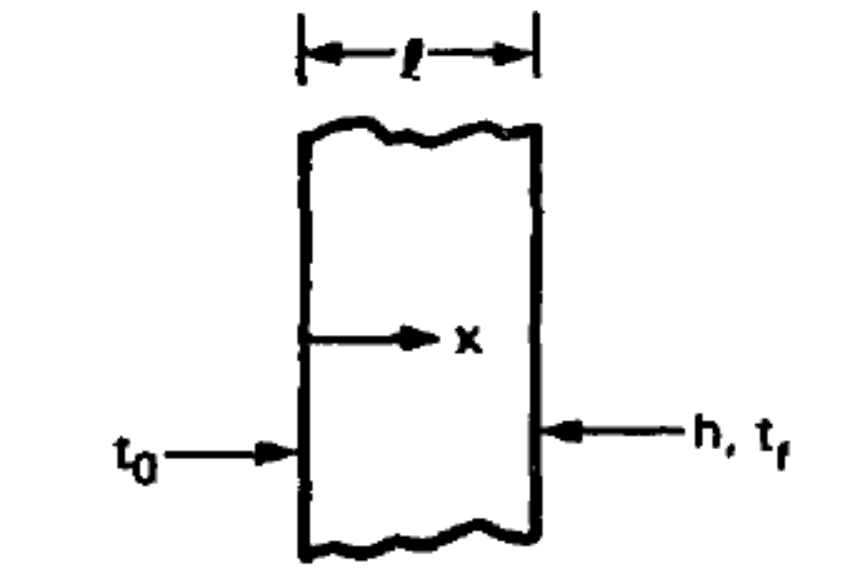


## Translating this into maths:

The heat equation governing such problems is given, with complete generality, as follows:
$$ \frac{\partial T} {\partial t} + v_{x} \frac{\partial T}{\partial x} + v_{y} \frac{\partial T}{\partial y} + v_{z} \frac{\partial T}{\partial z} = \alpha [ \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} + \frac{\partial^2 T}{\partial z^2} ] + \frac{H_v}{\rho C_p} $$

- Velocity terms drop out since only conduction occurs through the plate.
- No generation term either in the present situation.
- The problem is uni-dimensional in x.

Which ends up reducing the problem to the following form:

$$ \alpha \frac{\partial^2 T}{\partial x^2} = \frac{\partial T}{\partial t} $$

The boundary conditions for the problem are as follows:

$$ 
1. - k \frac{\partial T}{\partial x} = h (T_f - T) $$ 
at $ (x = l) $
$$ 2. T(x = 0 , t) = T_0 $$
$$ 3. T(x , t = 0) = T_0 $$


## Investigation of the given solution:



As given by the book, the solution amounts to the following expression:
$$ u = \frac{T - T_0}{T_f - T_0} = 2 \sum_{n=1}^{\infty} \frac{(Bi^2 + \lambda_n^{2}) [ 1 - cos(\lambda_n) ]}{(Bi^2 + Bi + \lambda_n^2)} sin(\lambda_n x) exp(-\lambda_n^2 Fo) $$
Where, as a reminder: 
$$ Fo = \frac{\alpha t}{l^2} $$ 
The Fourier number can be thought of intuitively in this case as the ratio of transient heat conduction through the plate to the amount that is stored, and is - at its core - another way of looking at the time variable in problems of heat transfer or mass transfer. 
The eigenvalues in the above solution are given by the following equation: 
$$ \lambda_n cot (\lambda_n) + Bi = 0 $$
Which has to be solved numerically in order to derive a representative trend.
However, upon some investigation, we see that the answer does not hold up under closer scrutiny. In fact, taking the system to very long time scales ($ t \rightarrow \infty $ ) ultimately zeros the de-dimensionalized variable $ u $ and technically means $ T = T_0 $ throughout the whole plate. 



## Plot of the given solution: ##

[  5.08698509   8.0961636   11.17270587  14.27635292  17.39324396
  20.51752291  23.64632382  26.77808708  29.91189387  33.04716869
  36.18353309  39.32072813  42.45857077  45.59692798  48.73570079
  51.87481405  55.01420968  58.15384208  61.29367497  64.4336791
  67.57383067  70.71411007  73.85450101  76.99498989  80.13556519
  83.27621716  86.41693745  89.55771888  92.69855524  95.83944114
  98.98037187 102.12134328 105.26235175 108.40339406 111.54446735
 114.68556907 117.82669696 120.96784898 124.10902329 127.25021824
 130.39143235 133.53266427 136.67391276 139.81517671 142.9564551
 146.097747   149.23905156 152.380368   155.52169559 158.66303367
 161.80438164 164.94573892 168.087105   171.22847939 174.36986164
 177.51125134 180.6526481  183.79405155 186.93546136 190.07687721
 193.21829881 196.35972589 199.50115817 202.64259543 205.78403743
 208.92548396 212.06693482 215.20838982 218.34984878 221.49131153
 224.63277792 227.77424778 230.91572099 234.0571974  237.1986769
 240.34015935

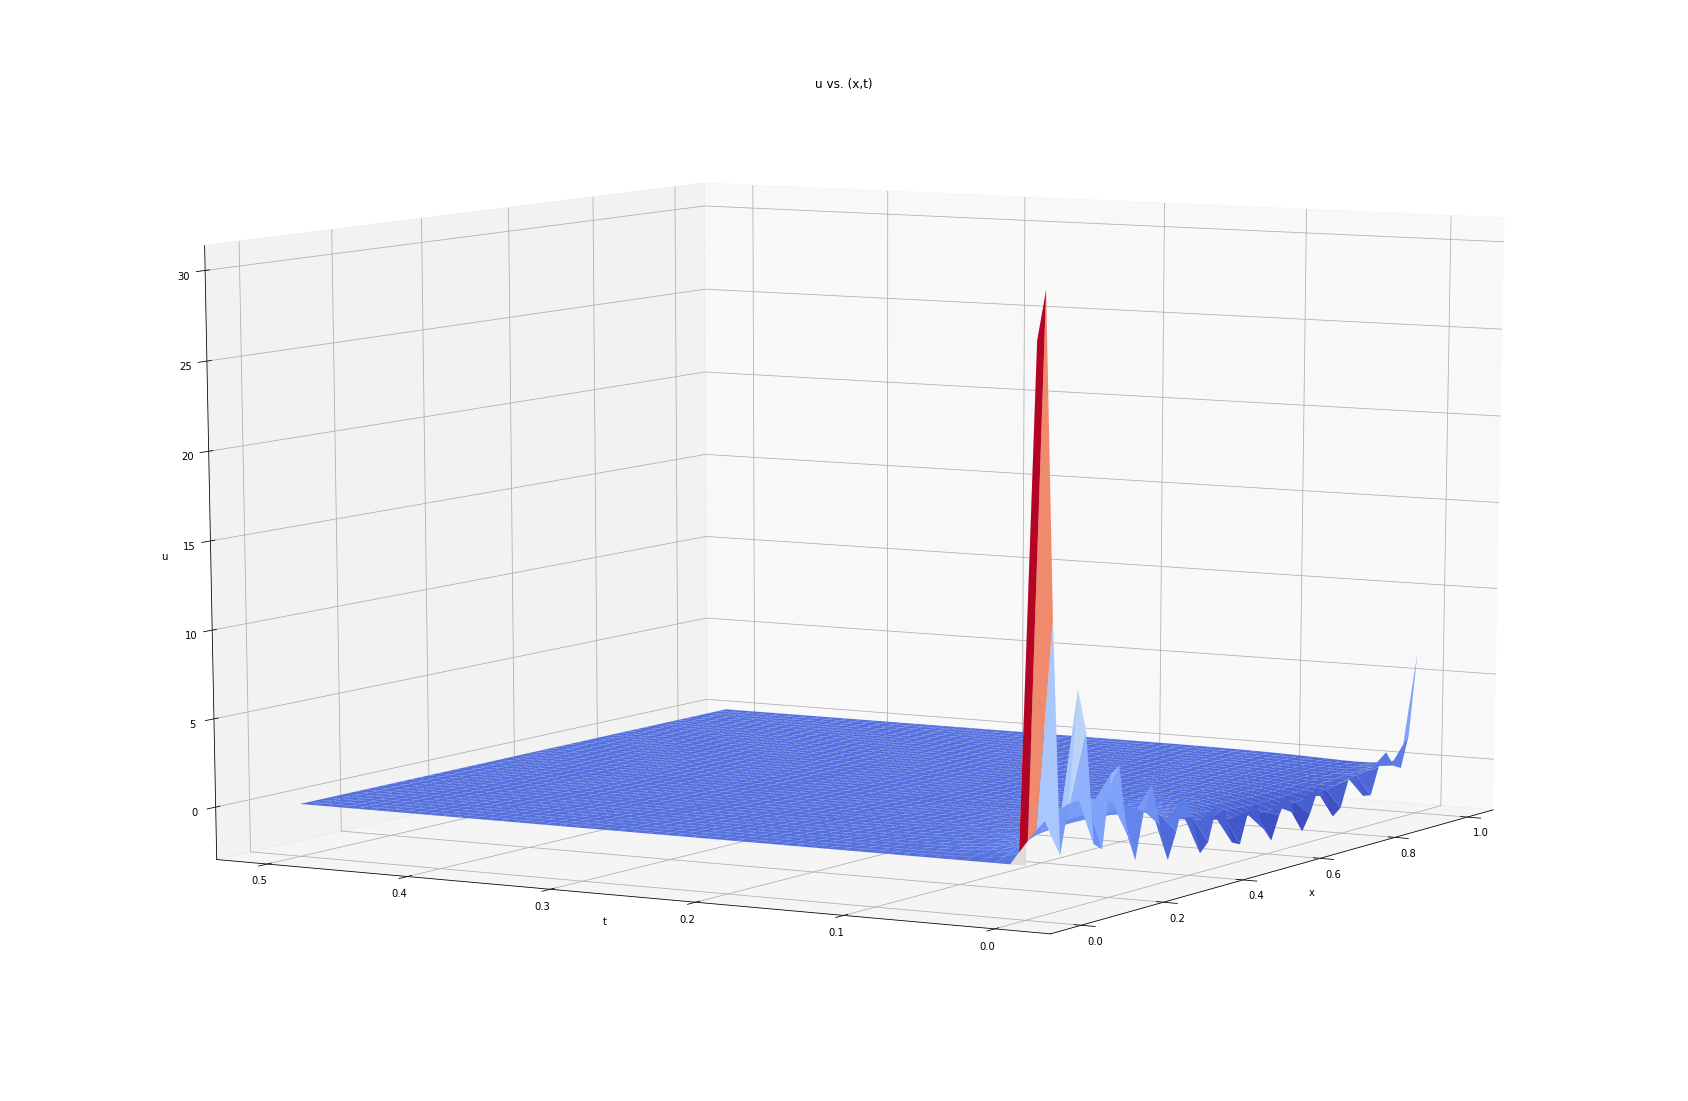

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import matplotlib.cm as cm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import math

#Number of terms in the Fourier series
N = 172

#k = 0 if text book solution
#k = 1  my solution
L = 1
a = 1
Nx = 50
Nt = 50
Bi = 2

x = np.linspace(0, L, Nx)
t = np.linspace(0, 0.5, Nt)

#Get square roots of eigenvalues
def eigenval(Bi, N, k):
    
    def guess_lamb():

        coeff = np.zeros(N+1)

        for i in range(N):
            if i%2 == 0:
                coeff[i] = (((-1)**(i/2))/math.factorial(i))*(Bi/(i+1) + (-1)**k)
            else:
                coeff[i] = 0

        r = np.roots(np.flipud(coeff))

        return abs(r[-3]), abs(r[-5])

    def f(x):
        if k == 1:
            return Bi*np.tan(x) - x
        else:
            return Bi*np.tan(x) + x

    n = np.linspace(1,N,N)

    #lamb is the square root of the lambda
    lamb = 0*n
    for i,ni in enumerate(n):
        if i < 2:
            guess = guess_lamb()
            lamb[i] = newton(f, guess[0] + (ni-1)*(guess[1]-guess[0]))
        else:
            lamb[i] = newton(f, 2*lamb[i-1] - lamb[i-2])
    
    return lamb

#returns the 2x2 matrix for u for x,t vectors
def u_xt(x, t, Bi, a, k):

    u_list = np.zeros([Nt, Nx])
    v = eigenval(Bi, N, k)
    print(v)
 
    def u_val(x_val, t_val, k):
        u = 0
        Fo = a*t_val/(L**2)
        for i in range(N):
            vi = v[i]
            if k == 1 :
                
                An = 2*np.sqrt(vi/(2*vi - np.sin(2*vi)))
                p = -(Bi/(Bi-1))*An*(np.sin(vi)/(vi**2) - np.cos(vi)/vi)
                phi = An*np.sin(vi*(x_val/L))
                C = p*(np.exp((-vi**2)*Fo))
                u = u + phi*C
            else:
                u = u + 2*(( (Bi**2 + vi**2)*(1 - np.cos(vi)) )/ (Bi**2 + Bi + vi**2))*np.sin(vi*x_val)*np.exp((-vi**2)*Fo)
         
        if k==1:
            u = u + (Bi/(Bi-1))*(x_val/L)
    
        return u

    for j in range(0, Nt):
        tj = t[j]
        for i in range(0,Nx):
            xi = x[i]
            u_list[j, i] = u_val(xi,tj, k)
    
    return u_list
    

xv, tv = np.meshgrid(x, t)
u_text = u_xt(x, t, Bi, a, 0)
#u_mine = u_xt(x, t, Bi, a, 1)

fig = plt.figure(figsize = (30,20))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(xv, tv, u_text, cmap = cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title('u vs. (x,t)')
ax.view_init(elev = 10, azim = -150)
    

The solution does not make any intuitive sense, formally. But the error in that answer was relatively easy to indicate: at $ t \rightarrow \infty $, the whole expression goes to zero. As stated above, what the expression lacks is a "linearizing term", i.e. a term that makes it linear at long time-scales which will bring out a linear conduction profile within the plate, as opposed to a constant temperature throughout (which does not make much physical sense).

## Solution procedure: ##

De-dimensionalize the temperature variable as being:
$$ u = \frac{T-T_0}{T_f-T_0} $$
It follows that:
$$ du = \frac{dT}{T_f - T_0} $$
De-dimensionalize the distance variable x as being:
$$ \eta = \frac{x}{l} $$

Applying these non-dimensionalized variables to the boundary conditions leads to:
   ### BC1:
$$ -k \frac{du}{dx} (T_f - T_0) = h(T_f - u(T_f - T_0) - T_0) $$
$$ - k \frac{du}{dx} = h(1-u) $$
$$  -k l \frac{du}{dx} = h l (1-u) $$
$$ - l \frac{du}{dx} = \frac{hl}{k} (1-u) $$
$$ - \frac{du}{d\eta} = Bi (1-u) $$
Or, in a slightly more convenient form:
$$ -\frac{du}{d\eta} + Bi u = Bi $$ 

### BC2: 
$$ u (\eta = 0, t) = 0 $$

### BC3: 
$$ u (\eta, t = 0) = 0 $$


### Governing Equation:
$$ \frac{\alpha}{l^2} \frac{\partial^2 u}{\partial \eta^2} = \frac{\partial u} {\partial t} $$


Which has to be solved consequently through the use of a Finite Fourier transform.

## Solving the Eigenvalue/Eigenfunction Problem 

The EVP is written in generic form as follows:
$$ \frac{d^2 \Phi}{dx^2} = -\lambda \Phi $$

### Characteristic Equation:
$$ r^2 + \lambda = 0 $$ 

### Boundary Conditions:
$$ 1. \eta = 1 : \rightarrow -\frac{d\Phi}{d\eta} + Bi \Phi = 0 $$
$$ 2. \eta = 0 : \rightarrow \Phi = 0 $$

For $ \lambda > 0 $
$$ \Phi = A sin\sqrt{\lambda} \eta + B cos\sqrt{\lambda} \eta $$
$$ \frac{d\Phi}{d\eta} = \sqrt{\lambda} [ - A cos\sqrt{\lambda} \eta - B sin \sqrt{\lambda} \eta ] $$
$$ -\frac{d\Phi}{d\eta} + Bi \Phi = \sqrt{\lambda} [B sin \sqrt{\lambda} \eta - A cos \sqrt{\lambda} \eta ] + Bi [A sin\sqrt{\lambda} \eta + B cos\sqrt{\lambda} \eta ] $$
In its final form, this reduces to:
$$ -\frac{d\Phi}{d\eta} + Bi \Phi = [\sqrt{\lambda} B + A(Bi)] sin\sqrt{\lambda} \eta + [(B)(Bi) - A\sqrt{\lambda}] cos\sqrt{\lambda} \eta $$

Since $\Phi = 0$ at $\eta = 0$ then the $B$ term drops out and the expression for $\Phi$ becomes:
$$\Phi = A sin\sqrt{\lambda} \eta $$

Applying now BC # 1 at $\eta = 1$ yields at the outset: 
$$ Bi - \sqrt{\lambda} cot \sqrt{\lambda} = 0 $$
Which has to be solved numerically in order to output values for $\lambda$. 

### Normalization:
$$ \frac{1}{A^2} = \int_0^1 sin^2{\sqrt{\lambda}} \eta = \int_0^1 \frac{1-cos2\sqrt{\lambda} \eta}{2} $$
Ultimately reducing to:
$$ \frac{1}{A^2} = \frac{1}{4\sqrt{\lambda}} [2\sqrt{\lambda} - sin2\sqrt{\lambda}] $$


### Final Expression:
$$ \Phi_n (\eta) = A sin \sqrt{\lambda} \eta $$
As such:
$$ \Phi_n (\eta) = 2 \sqrt{ \frac{\sqrt{\lambda_n}}{2\sqrt{\lambda_n} - sin 2\sqrt{\lambda}} } sin \sqrt{\lambda_n} \eta $$


## Applying the Finite Fourier Transform


### Recasting the Expression in terms of our new variable
Since this problem is non-homogeneous, it requires that we apply a new solution approach by defining:
$$ z = u + c_1 \eta + c_2 $$
Where, now, using the above equation, our problem is of the homogeneous type:
$$ \eta = 0 $$ leads to:
$$ z = c_2 = 0 $$
Moreover, 
$$ -\frac{dz}{d\eta} + Bi(z) = 0 $$
(hencewhy the problem can now be considered homogeneous). This in turn reduces to:
$$ c_1 = \frac{Bi}{1-Bi} $$
It follows then that:
$$ z = u - (\frac{Bi}{1-Bi}) \eta $$
Recasting our problem in terms of the $z$ variable:
$$ (\frac{\alpha}{l^2}) \frac {\partial^2 z }{\partial \eta^2} = \frac {\partial z}{\partial t} $$


### Applying Fourier
Note the definition of $z_n$ given as follows:
$$ z_n = \sum C_n(t)\Phi_n(\eta) $$

$$ \int_0^1 \frac{d^2 z}{d\eta^2} \Phi_n d\eta  = -\lambda_n C_n(t)  $$
So that:
$$ \frac{\alpha}{l^2} \int_0^1 \frac{d^2 z}{d\eta^2} \Phi_n d\eta  = - \frac{\alpha}{l^2} \lambda_n C_n(t)  $$
Also,
$$ \int \frac{dz}{dt} \Phi_n d\eta = \frac{dC_n(t)}{dt} $$

Re-arranging:
$$ \frac{dC_n(t)}{C_n(t)} = - \frac{\alpha}{l^2} \lambda_n dt $$
$$ dln(C_n(t)) = -\frac{\alpha}{l^2} \lambda_n dt $$
$$ ln(C_n(t)) = -\frac{\alpha}{l^2} \lambda_n t + c $$
$$ C_n(t) = \kappa exp(-\frac{\alpha}{l^2} \lambda_n t) $$

To get the integration constant:
$$ C_n (t=0) = \kappa = \int \frac{Bi}{1-Bi} \eta \Phi_n d\eta $$
Which, conveniently enough, turns out to be:
$$ C_n (t=0) = \kappa = \frac{-Bi}{Bi-1} \int(\eta sin \sqrt{\lambda} \eta A_n) $$ 
And so:
$$ \kappa = \frac{-Bi A_n}{Bi - 1}  [-\frac{cos{\sqrt{\lambda}}}{\sqrt{\lambda}} + \frac{sin{\sqrt{\lambda}}}{\lambda}] $$
And so the $C_n$ expression is determined to be as follows:
$$ C_n(t) = \kappa exp(-\frac{\alpha}{l^2} \lambda_n t)$$
Where: 
$$ \kappa = \frac{-Bi A_n}{Bi - 1}[\frac{cos{\sqrt{\lambda}}}{\sqrt{\lambda}} + \frac{sin{\sqrt{\lambda}}}{\lambda}] $$ 


## Putting it all together 

$$ z = \sum \Phi_n(\eta) C_n(t) $$
Where: 
$$ C_n(t) = \kappa exp(-\frac{\alpha}{l^2} \lambda_n t) $$
$$ \Phi_n (\eta) = 2 \sqrt{ \frac{\sqrt{\lambda_n}}{2\sqrt{\lambda_n} - sin 2\sqrt{\lambda}} } sin \sqrt{\lambda_n} \eta $$

[  4.27478227   7.59654602  10.81267333  13.99522209  17.16275139
  20.32225386  23.47696019  26.62857101  29.7780674   32.92605523
  36.07292898  39.21895656  42.36432632  45.50917455  48.65360234
  51.79768619  54.94148514  58.08504542  61.22840378  64.37158978
  67.5146275   70.65753672  73.80033384  76.94303261  80.08564459
  83.22817962  86.3706461   89.51305123  92.65540127  95.79770164
  98.93995706 102.08217169 105.22434918 108.36649275 111.50860529
 114.65068933 117.79274717 120.93478083 124.07679216 127.21878282
 130.36075429 133.50270793 136.64464497 139.78656653 142.92847364
 146.07036722 149.21224812 152.35411714 155.49597499 158.63782234
 161.7796598  164.92148793 168.06330725 171.20511826 174.3469214
 177.48871708 180.63050571 183.77228763 186.91406319 190.05583271
 193.19759647 196.33935476 199.48110783 202.62285592 205.76459927
 208.90633809 212.04807257 215.18980292 218.3315293  221.47325189
 224.61497084 227.75668631 230.89839844 234.04010736 237.1818132
 240.3235160

C:\Users\koolk\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\koolk\Anaconda3\lib\site-packages\matplotlib\colors.py:924: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


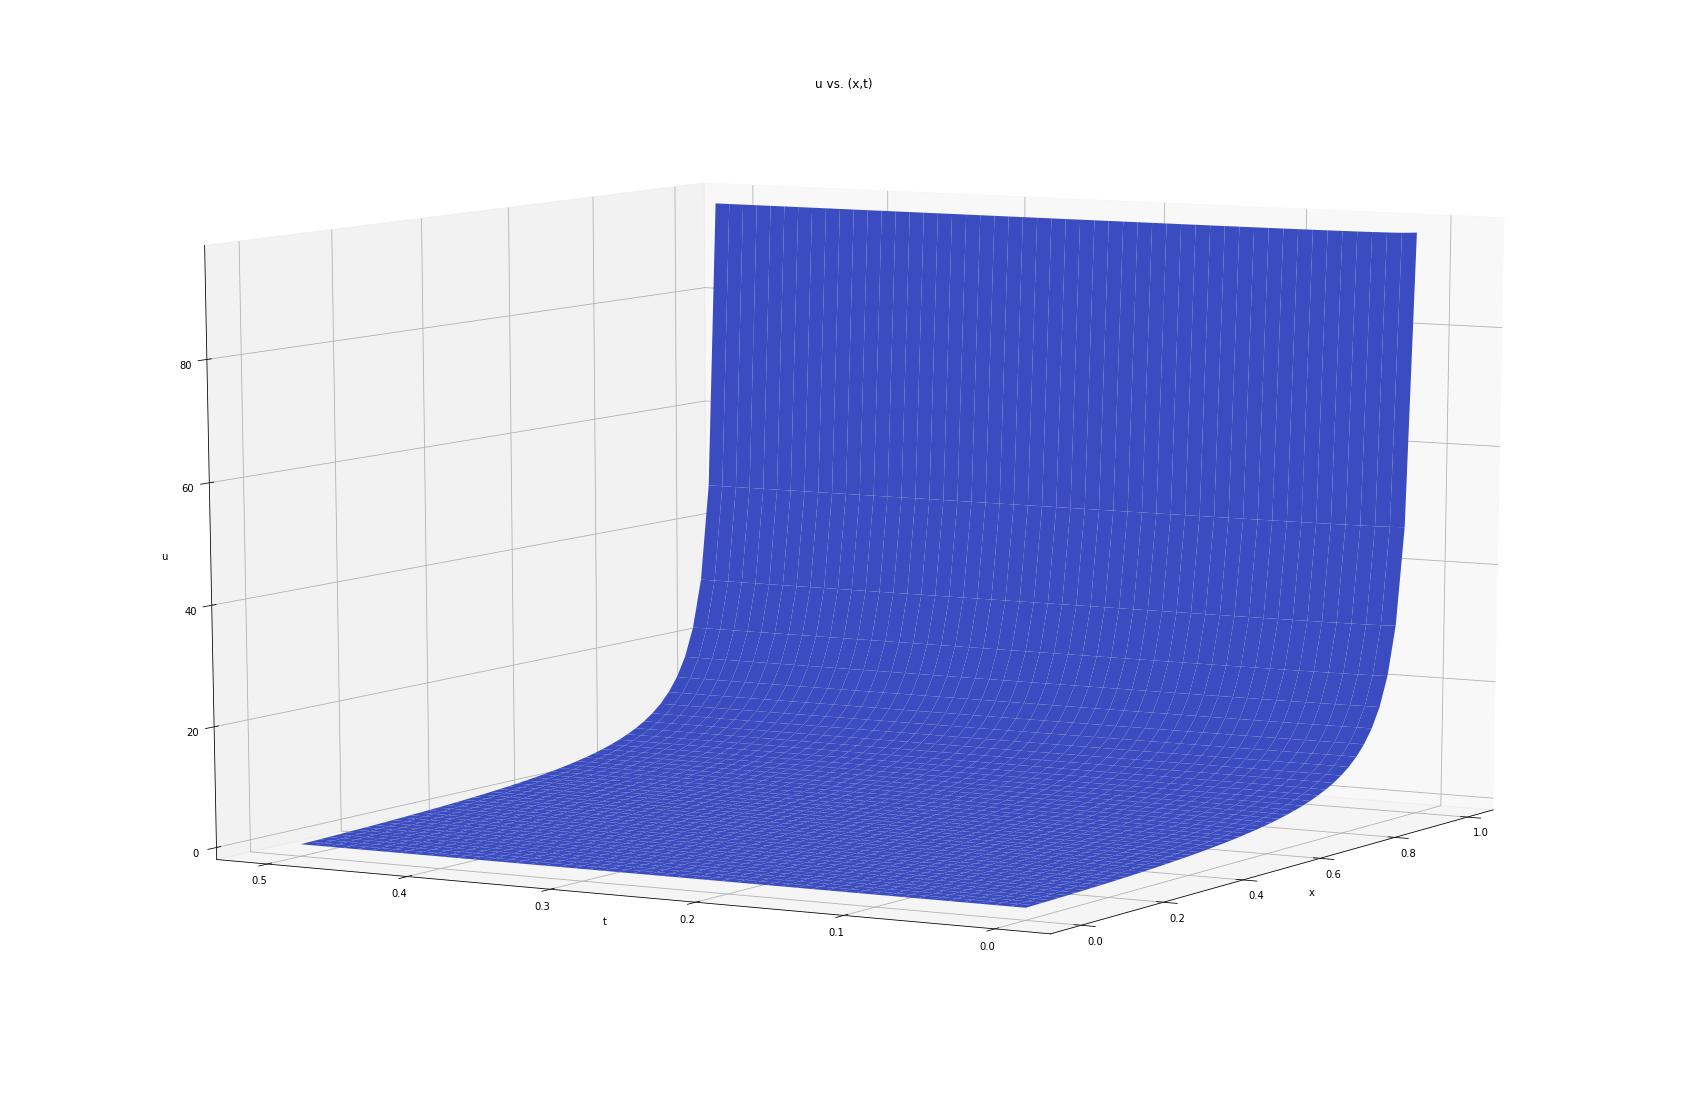

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
import matplotlib.cm as cm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import math

#Number of terms in the Fourier series
N = 172

#k = 0 if text book solution
#k = 1  my solution
L = 1
a = 1
Nx = 50
Nt = 50
Bi = 2

x = np.linspace(0, L, Nx)
t = np.linspace(0, 0.5, Nt)

#Get square roots of eigenvalues
def eigenval(Bi, N, k):
    
    def guess_lamb():

        coeff = np.zeros(N+1)

        for i in range(N):
            if i%2 == 0:
                coeff[i] = (((-1)**(i/2))/math.factorial(i))*(Bi/(i+1) + (-1)**k)
            else:
                coeff[i] = 0

        r = np.roots(np.flipud(coeff))

        return abs(r[-3]), abs(r[-5])

    def f(x):
        if k == 1:
            return Bi*np.tan(x) - x
        else:
            return Bi*np.tan(x) + x

    n = np.linspace(1,N,N)

    #lamb is the square root of the lambda
    lamb = 0*n
    for i,ni in enumerate(n):
        if i < 2:
            guess = guess_lamb()
            lamb[i] = newton(f, guess[0] + (ni-1)*(guess[1]-guess[0]))
        else:
            lamb[i] = newton(f, 2*lamb[i-1] - lamb[i-2])
    
    return lamb

#returns the 2x2 matrix for u for x,t vectors
def u_xt(x, t, Bi, a, k):

    u_list = np.zeros([Nt, Nx])
    v = eigenval(Bi, N, k)
    print(v)
 
    def u_val(x_val, t_val, k):
        u = 0
        Fo = a*t_val/(L**2)
        for i in range(N):
            vi = v[i]
            if k == 1 :
                
                An = 2*np.sqrt(vi/(2*vi - np.sin(2*vi)))
                p = -(Bi/(Bi-1))*An*(np.sin(vi)/(vi**2) - np.cos(vi)/vi)
                phi = An*np.sin(vi*(x_val/L))
                C = p*(np.exp((-vi**2)*Fo))
                u = u + phi*C
            else:
                u = u + 2*(( (Bi**2 + vi**2)*(1 - np.cos(vi)) )/ (Bi**2 + Bi + vi**2))*np.sin(vi*x_val)*np.exp((-vi**2)*Fo)
         
        if k==1:
            u = u + (Bi/(Bi-1))*(x_val/L)
            #u = u + (-Bi/((x_val/L)-1))*(x_val/L)
    
        return u

    for j in range(0, Nt):
        tj = t[j]
        for i in range(0,Nx):
            xi = x[i]
            u_list[j, i] = u_val(xi,tj, k)
    
    return u_list
    

xv, tv = np.meshgrid(x, t)
#u_text = u_xt(x, t, Bi, a, 0)
u_mine = u_xt(x, t, Bi, a, 1)

fig = plt.figure(figsize = (30,20))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(xv, tv, u_mine, cmap = cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
ax.set_title('u vs. (x,t)')
ax.view_init(elev = 10, azim = -150)


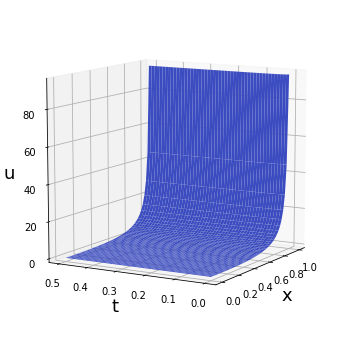

In [23]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(xv, tv, u_mine - (Bi/(Bi-1))*(x/L), cmap = cm.coolwarm)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('t', fontsize=18)
ax.set_zlabel('u', fontsize=18)
#ax.set_title('u vs. (x,t)')
ax.view_init(elev = 10, azim = -150)

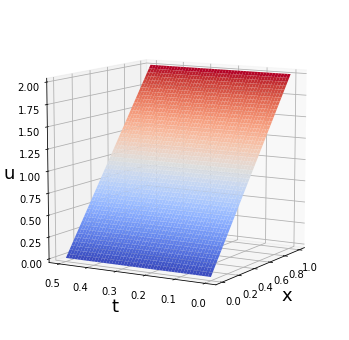

In [24]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(xv, tv, (Bi/(Bi-1))*(xv/L), cmap = cm.coolwarm)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('t', fontsize=18)
ax.set_zlabel('u', fontsize=18)
#ax.set_title('u vs. (x,t)')
ax.view_init(elev = 10, azim = -150)

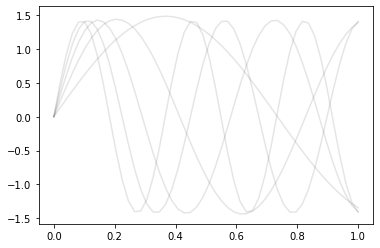

In [16]:
k = 1
v = eigenval(Bi, N, k)
fig, ax = plt.subplots()
for vi in v[0:5]:
    #print(An)
    An = 2*np.sqrt(vi/(2*vi - np.sin(2*vi)))
    phi = An*np.sin(vi*(x/L))
    ax.plot(x, phi, c='k', alpha=0.1)

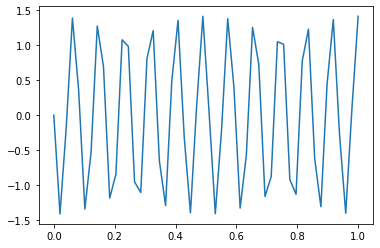